In [77]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp

# Must have Node.js and npm and extension for interactive plotting
import plotly
import plotly.express as px
plotly.offline.init_notebook_mode(connected=True)
from scipy.stats import zscore

file_path = 'body_fat_measurments.csv'


In [78]:
df = pd.read_csv(file_path)

df.reset_index(drop=True, inplace=True)

df.drop(df.columns[0],axis=1,inplace=True)

In [79]:
df

,body_fat_percentage,age_yrs,weight_lbs,height_in,neck_cm,chest_cm,abdomen_cm,hip_cm,thigh_cm,knee_cm,ankle_cm,biceps_cm,forearm_cm,wrist_cm
0,35.2,46,363.15,72.25,51.2,136.2,148.1,147.7,87.3,49.1,29.6,45.0,29.0,21.4
1,11.8,27,168.00,71.25,38.1,93.0,79.1,94.5,57.3,36.2,24.5,29.0,30.0,18.8
2,22.2,69,177.75,68.50,38.7,102.0,95.0,98.3,55.0,38.3,21.8,30.8,25.7,18.8
3,10.6,57,147.75,65.75,35.2,99.6,86.4,90.1,53.0,35.0,21.3,31.7,27.3,16.9
4,47.5,51,219.00,64.00,41.2,119.8,122.1,112.8,62.5,36.9,23.6,34.7,29.1,18.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
247,31.9,74,207.50,70.00,40.8,112.4,108.5,107.1,59.3,42.2,24.6,33.7,30.0,20.9
248,23.6,43,170.75,67.50,37.4,103.7,89.7,94.2,58.5,39.0,24.1,33.8,28.8,18.8
249,20.9,35,162.75,66.00,36.4,99.1,92.8,99.2,63.1,38.7,21.7,31.1,26.4,16.9
250,17.0,56,167.75,68.50,37.4,98.6,93.0,97.0,55.4,38.8,23.2,32.4,29.7,19.0


df.to_csv(file_path, index=False)

[col for col in df.columns if 

Check for any null or nan values in dataframe. Second ".any()" checks all column results.

In [1]:
df.isna().any().any()

NameError: name 'df' is not defined

In [81]:
df.describe()

,body_fat_percentage,age_yrs,weight_lbs,height_in,neck_cm,chest_cm,abdomen_cm,hip_cm,thigh_cm,knee_cm,ankle_cm,biceps_cm,forearm_cm,wrist_cm
count,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000
mean,19.150794,44.884921,178.924405,70.148810,37.992063,100.824206,92.555952,99.904762,59.405952,38.590476,23.102381,32.273413,28.663889,18.229762
std,8.368740,12.602040,29.389160,3.662856,2.430913,8.430476,10.783077,7.164058,5.249952,2.411805,1.694893,3.021274,2.020691,0.933585
min,0.000000,22.000000,118.500000,29.500000,31.100000,79.300000,69.400000,85.000000,47.200000,33.000000,19.100000,24.800000,21.000000,15.800000
25%,12.475000,35.750000,159.000000,68.250000,36.400000,94.350000,84.575000,95.500000,56.000000,36.975000,22.000000,30.200000,27.300000,17.600000
50%,19.200000,43.000000,176.500000,70.000000,38.000000,99.650000,90.950000,99.300000,59.000000,38.500000,22.800000,32.050000,28.700000,18.300000
75%,25.300000,54.000000,197.000000,72.250000,39.425000,105.375000,99.325000,103.525000,62.350000,39.925000,24.000000,34.325000,30.000000,18.800000
max,47.500000,81.000000,363.150000,77.750000,51.200000,136.200000,148.100000,147.700000,87.300000,49.100000,33.900000,45.000000,34.900000,21.400000


In [83]:
df[df['height_in']<40]

,body_fat_percentage,age_yrs,weight_lbs,height_in,neck_cm,chest_cm,abdomen_cm,hip_cm,thigh_cm,knee_cm,ankle_cm,biceps_cm,forearm_cm,wrist_cm
78,32.9,44,205.0,29.5,36.6,106.0,104.3,115.5,70.6,42.5,23.7,33.6,28.7,17.4


I'm not sure it's possible to be 2 feet 5 and weigh 205 lbs.

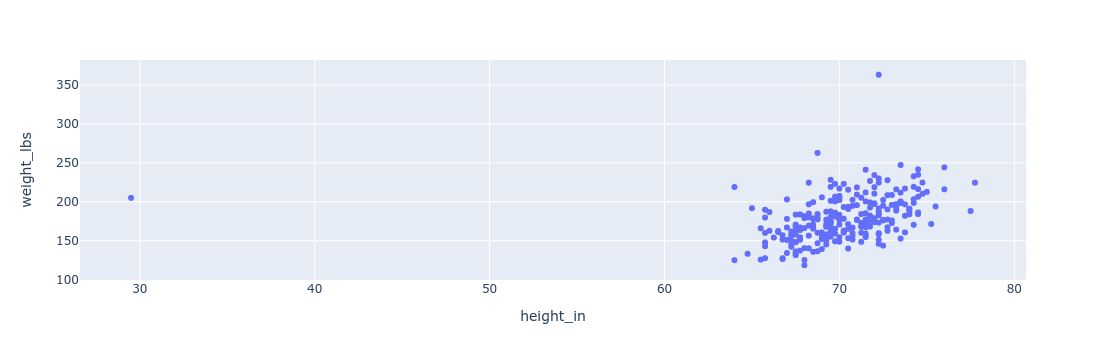

In [85]:
fig = px.scatter(df,x='height_in', y='weight_lbs')
fig.show()

In [86]:
numeric_cols = df.select_dtypes(include=[np.number]).columns
z_df = df[numeric_cols].apply(zscore)

z_df.stack()[z_df.stack() >= 3]

In [88]:
df.iloc[[0,4,35,73,82,93,187]]

,body_fat_percentage,age_yrs,weight_lbs,height_in,neck_cm,chest_cm,abdomen_cm,hip_cm,thigh_cm,knee_cm,ankle_cm,biceps_cm,forearm_cm,wrist_cm
0,35.2,46,363.15,72.25,51.2,136.2,148.1,147.7,87.3,49.1,29.6,45.0,29.0,21.4
4,47.5,51,219.00,64.00,41.2,119.8,122.1,112.8,62.5,36.9,23.6,34.7,29.1,18.4
35,26.6,67,167.00,67.50,36.5,98.9,89.7,96.2,54.7,37.8,33.7,32.4,27.7,18.2
73,12.5,30,136.50,68.75,35.9,88.7,76.6,89.8,50.1,34.8,21.8,27.0,34.9,16.9
82,34.5,45,262.75,68.75,43.2,128.3,126.2,125.6,72.5,39.6,26.6,36.4,32.7,21.4
93,11.9,32,182.00,73.75,38.7,100.5,88.7,99.8,57.5,38.7,33.9,32.5,27.7,18.4
187,32.6,67,227.75,72.75,41.3,115.8,113.4,109.8,65.6,46.0,25.4,35.3,29.8,19.5


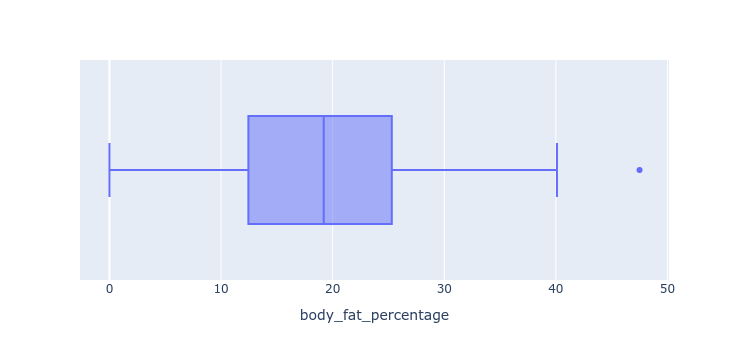

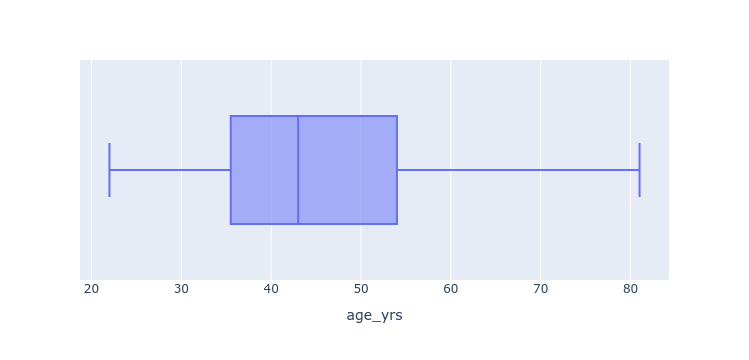

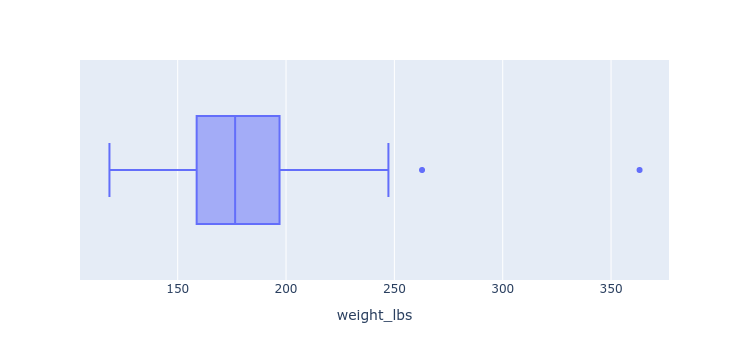

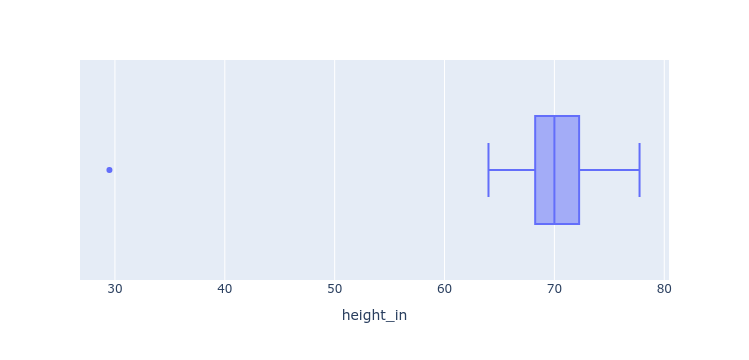

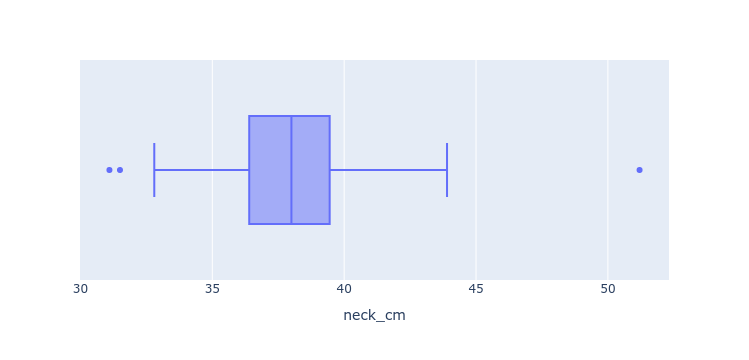

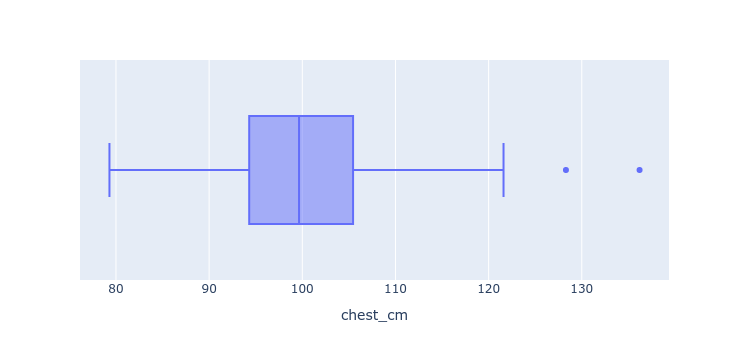

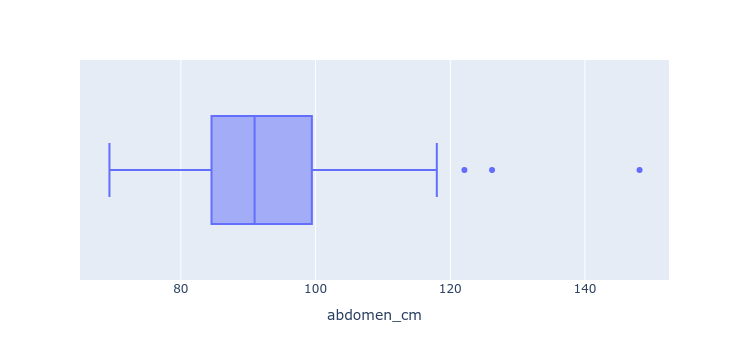

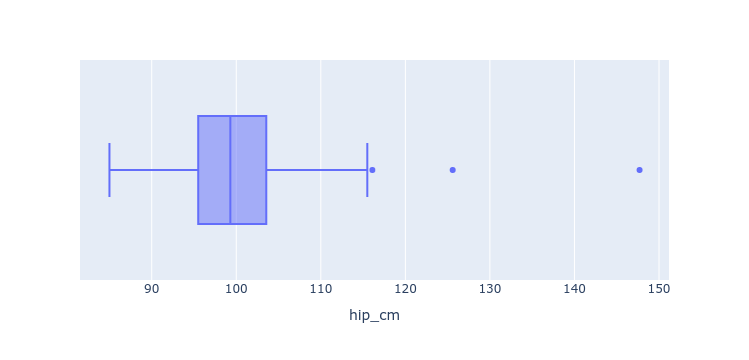

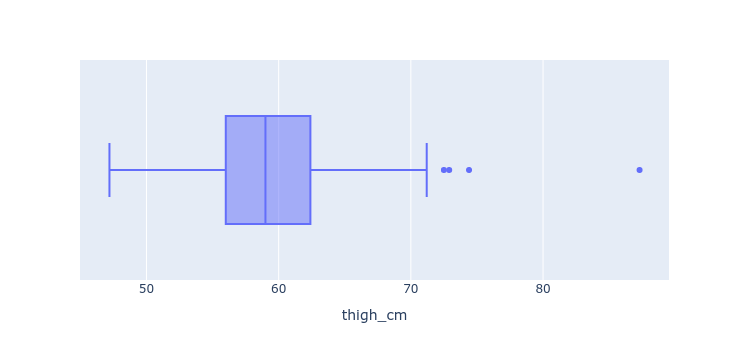

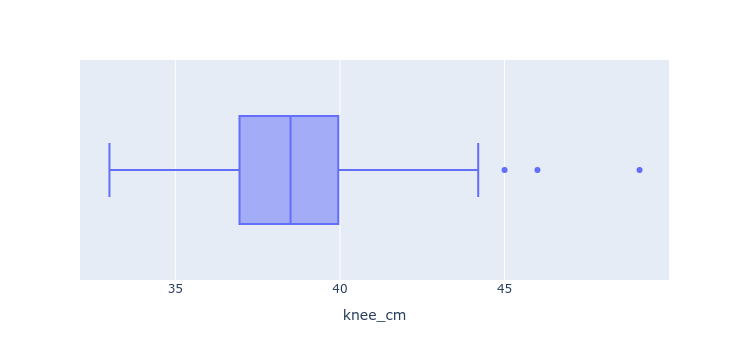

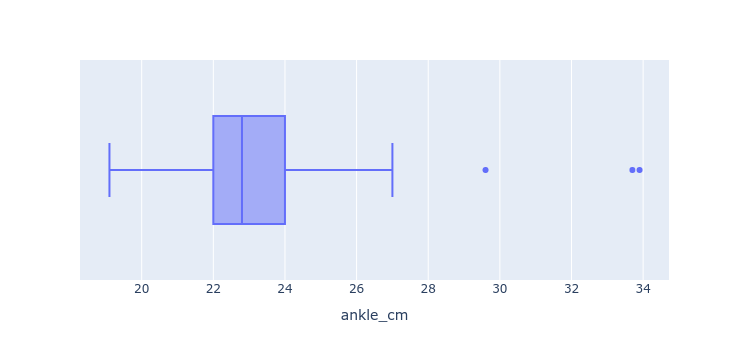

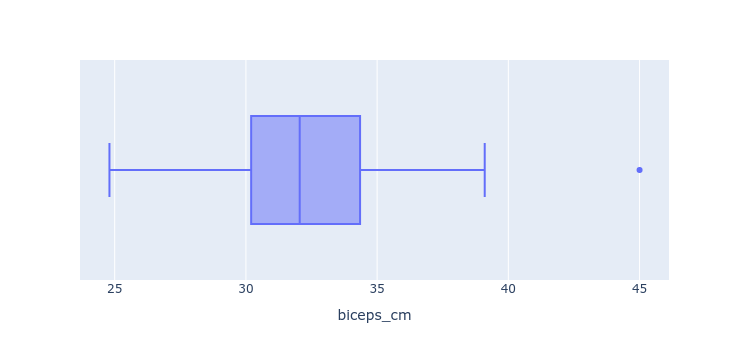

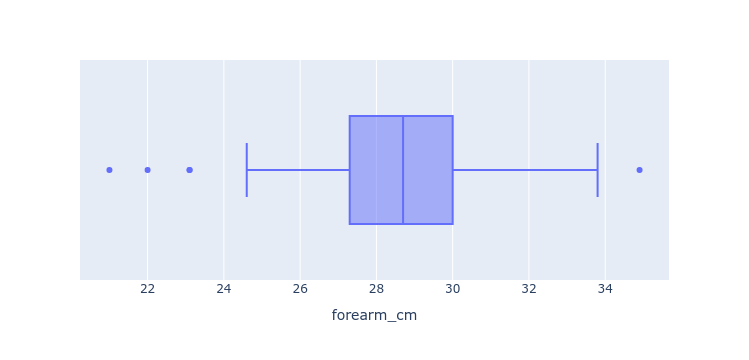

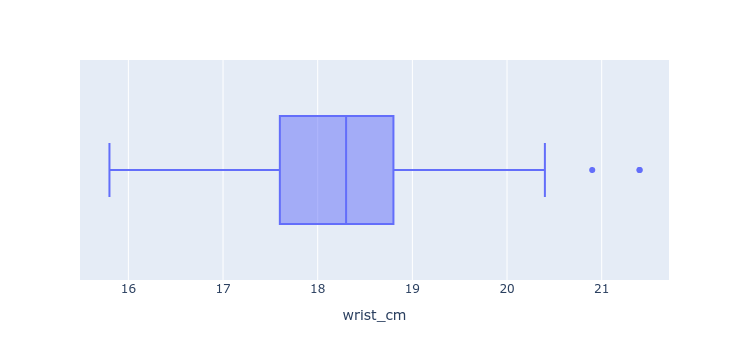

In [89]:
# Visual inspection
for col in df.columns:
    fig= px.box(df,x=col)
    fig.show()

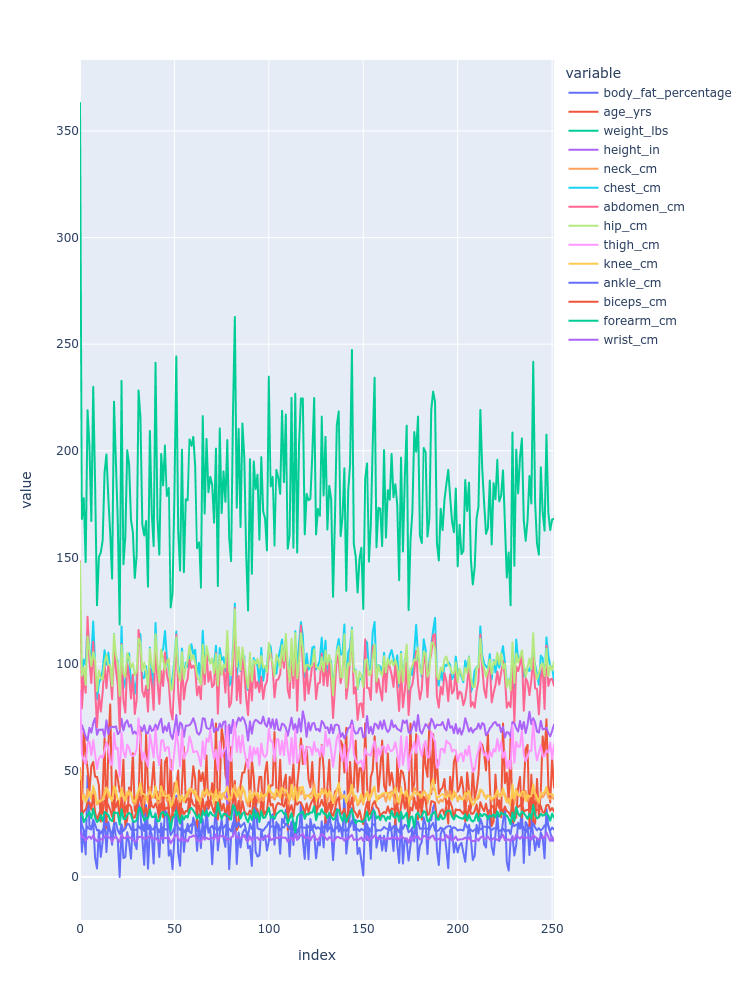

In [90]:
# for col in cols
fig= px.line(df,y=df.columns,height=1000, width=1500)
fig.show()

In [96]:
df.columns

Index(['body_fat_percentage', 'age_yrs', 'weight_lbs', 'height_in', 'neck_cm',
       'chest_cm', 'abdomen_cm', 'hip_cm', 'thigh_cm', 'knee_cm', 'ankle_cm',
       'biceps_cm', 'forearm_cm', 'wrist_cm'],
      dtype='object')

X = df[['age_yrs', 'weight_lbs', 'height_in', 'neck_cm',
       'chest_cm', 'abdomen_cm', 'hip_cm', 'thigh_cm', 'knee_cm', 'ankle_cm',
       'biceps_cm', 'forearm_cm', 'wrist_cm']]
Y = df['body_fat_percentage']

In [127]:
X = df[['weight_lbs',
       'abdomen_cm',
       'forearm_cm', 'wrist_cm']]
Y = df['body_fat_percentage']

In [128]:
# from sklearn import linear_model



# with sklearn
# regr = linear_model.LinearRegression()
# regr.fit(X, Y)

# print('Intercept: \n', regr.intercept_)
# print('Coefficients: \n', regr.coef_)

# prediction with sklearn
# New_Interest_Rate = 2.75
# New_Unemployment_Rate = 5.3
# print ('Predicted Stock Index Price: \n', regr.predict([[New_Interest_Rate ,New_Unemployment_Rate]]))

In [129]:
import statsmodels.api as sm
X = sm.add_constant(X) # adding a constant
 
model = sm.OLS(Y, X).fit()
predictions = model.predict(X) 
 
print_model = model.summary()
print(print_model)

                             OLS Regression Results                            
Dep. Variable:     body_fat_percentage   R-squared:                       0.735
Model:                             OLS   Adj. R-squared:                  0.731
Method:                  Least Squares   F-statistic:                     171.3
Date:                 Wed, 20 Jul 2022   Prob (F-statistic):           5.39e-70
Time:                         10:36:39   Log-Likelihood:                -725.11
No. Observations:                  252   AIC:                             1460.
Df Residuals:                      247   BIC:                             1478.
Df Model:                            4                                         
Covariance Type:             nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -34.8541      7.245     -4.81

In [140]:
weight = 250
wrist = 20
abdomen = 100
forearm = 30

In [144]:
y = -0.1356*weight + abdomen + 0.4729*forearm + -1.5056*wrist - 34.85 
print(f'predicted body fat % = {y:.2f}')

predicted body fat % = 15.32


In [133]:
df['forearm_cm'].median()

28.7